# Halloween Crashes

How many crashes take place on Oct 31?

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib._color_data import BASE_COLORS, TABLEAU_COLORS, CSS4_COLORS, XKCD_COLORS
from datetime import datetime, timedelta
import pytz
import inflect
p = inflect.engine()

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

from crash_data_analysis import CrashDataAnalysis

In [2]:
%%time
cda = CrashDataAnalysis()
df = cda.crash_dataframe(verbose=True)

Reading file: data/denver_crashes_2022_10_24__11_00.csv
Max timestamp: Fri Oct 21, 9:25 PM (2.71 days ago)
Deadly crashes this year: 66
CPU times: user 10.7 s, sys: 519 ms, total: 11.2 s
Wall time: 11.4 s


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220277 entries, 122996 to 220203
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype                         
---  ------                        --------------   -----                         
 0   incident_id                   220277 non-null  int64                         
 1   top_traffic_accident_offense  220277 non-null  object                        
 2   reported_date                 220277 non-null  datetime64[ns, America/Denver]
 3   incident_address              220277 non-null  object                        
 4   geo_lon                       211750 non-null  float64                       
 5   geo_lat                       211750 non-null  float64                       
 6   neighborhood_id               209681 non-null  object                        
 7   bicycle_ind                   197324 non-null  float64                       
 8   pedestrian_ind                197324 non-null  fl

In [31]:
crashes_by_date = df.groupby(df.reported_date.dt.date).agg(
    crashes=('one', 'sum')
    , pedestrian=('pedestrian_ind', 'sum')
).reset_index()

In [32]:
crashes_by_date['reported_date'] = pd.to_datetime(crashes_by_date['reported_date'])

In [44]:
crashes_by_date['month_date'] = crashes_by_date.reported_date.dt.strftime('%m-%d')
avg_pedestrian_crashes_by_date = crashes_by_date.groupby('month_date').pedestrian.mean()

In [34]:
oct_nov = crashes_by_date.reported_date.dt.month.isin([10,11])

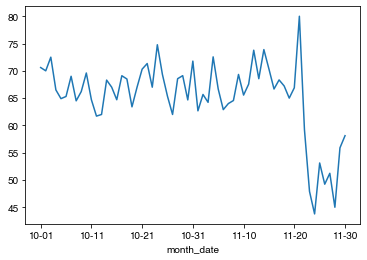

In [35]:
_ = crashes_by_date.loc[oct_nov].groupby('month_date').crashes.mean().plot()

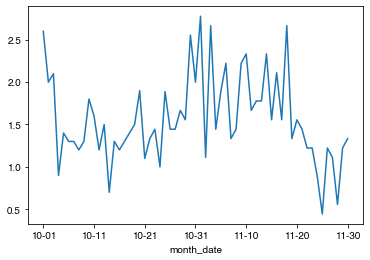

In [36]:
_ = crashes_by_date.loc[oct_nov].groupby('month_date').pedestrian.mean().plot()

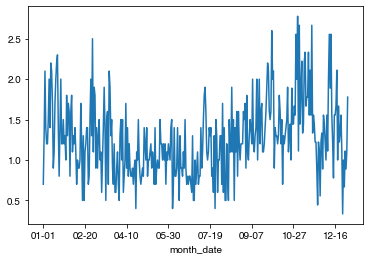

In [38]:
_ = crashes_by_date.groupby('month_date').pedestrian.mean().plot()

In [46]:
avg_pedestrian_crashes_by_date.sort_values(ascending=False).head(20)

month_date
11-01    2.777778
11-18    2.666667
11-03    2.666667
10-01    2.600000
10-30    2.555556
12-11    2.555556
12-09    2.555556
02-29    2.500000
11-14    2.333333
11-10    2.333333
01-18    2.300000
11-09    2.222222
11-06    2.222222
01-10    2.200000
09-26    2.200000
01-17    2.200000
12-18    2.111111
11-16    2.111111
10-03    2.100000
09-27    2.100000
Name: pedestrian, dtype: float64

In [49]:
pd.set_option('max_rows', 500)
avg_pedestrian_crashes_by_date

month_date
01-01    0.700000
01-02    1.300000
01-03    2.100000
01-04    1.400000
01-05    1.200000
01-06    1.200000
01-07    1.500000
01-08    2.000000
01-09    1.400000
01-10    2.200000
01-11    2.100000
01-12    1.700000
01-13    0.900000
01-14    1.100000
01-15    1.700000
01-16    2.000000
01-17    2.200000
01-18    2.300000
01-19    1.400000
01-20    0.800000
01-21    1.400000
01-22    2.000000
01-23    1.200000
01-24    1.200000
01-25    1.500000
01-26    1.200000
01-27    1.300000
01-28    1.000000
01-29    1.800000
01-30    1.300000
01-31    1.700000
02-01    1.600000
02-02    0.800000
02-03    1.600000
02-04    1.800000
02-05    1.100000
02-06    1.300000
02-07    1.200000
02-08    1.400000
02-09    1.100000
02-10    0.700000
02-11    1.000000
02-12    0.900000
02-13    0.900000
02-14    1.000000
02-15    1.700000
02-16    1.200000
02-17    0.500000
02-18    1.300000
02-19    0.500000
02-20    1.100000
02-21    1.200000
02-22    1.400000
02-23    1.400000
02-24    0.700000